# This is a Data set of cars of different makes and their prices .

The symboling column tells us a factor which determines the safety .
3 being the worst in terms of safety and -3 being the best , in terms of safety .  

# Importing the dataset  and libraries that we need . 

In [53]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
da = pd.read_csv("CarPrice_Assignment.csv")

Checking out what the dataset contains .

In [54]:
da
da.head()
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Looks like there is an extra column actin as an index ,
so we'll  be removing this extra column.

We will rename the columns so they are easier to use later on .

In [55]:
da.drop("car_ID", axis = 1, inplace = True)
da=da.rename(columns  = {'symboling':'Symboling','CarName':'Name','fueltype':'Fuel','aspiration':'Aspiration','doornumber':'Doors','carbody':'Body','drivewheel':'Drive','enginelocation':'Engineloc',\
                         'wheelbase':'Wheelbase','carlength':'Length','carwidth':'Width','carhieght':'Height','fuelsystem':'Fuelsys','compressionratio':'Compression'})
da

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


# Data Exploration .
 we will be checking for missing values , null values and what columns contain categorical data .
 we wil also check which columns will be corelating with the price the most .
 we will also be checking for features in the data .
 

In [56]:
da.isnull().any()
#Looks like none of the columns have any null values

Symboling         False
Name              False
Fuel              False
Aspiration        False
Doors             False
Body              False
Drive             False
Engineloc         False
Wheelbase         False
Length            False
Width             False
carheight         False
curbweight        False
enginetype        False
cylindernumber    False
enginesize        False
Fuelsys           False
boreratio         False
stroke            False
Compression       False
horsepower        False
peakrpm           False
citympg           False
highwaympg        False
price             False
dtype: bool

In [57]:
da.isna().any()
#Looks like the dataset has no mising values either  

Symboling         False
Name              False
Fuel              False
Aspiration        False
Doors             False
Body              False
Drive             False
Engineloc         False
Wheelbase         False
Length            False
Width             False
carheight         False
curbweight        False
enginetype        False
cylindernumber    False
enginesize        False
Fuelsys           False
boreratio         False
stroke            False
Compression       False
horsepower        False
peakrpm           False
citympg           False
highwaympg        False
price             False
dtype: bool

In [58]:
# This wil give us an idea of which columns contain object values and we will look into that first .
da.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
Symboling         205 non-null int64
Name              205 non-null object
Fuel              205 non-null object
Aspiration        205 non-null object
Doors             205 non-null object
Body              205 non-null object
Drive             205 non-null object
Engineloc         205 non-null object
Wheelbase         205 non-null float64
Length            205 non-null float64
Width             205 non-null float64
carheight         205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
Fuelsys           205 non-null object
boreratio         205 non-null float64
stroke            205 non-null float64
Compression       205 non-null float64
horsepower        205 non-null int64
peakrpm           205 non-null int64
citympg           205 non-null int64
highwaympg        20

In [59]:
da.groupby('Fuel').count()
# so there are two Fuel types diesel and gas

,Symboling,Name,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,Width,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
Fuel,,,,,,,,,,,,,,,,,,,,,
diesel,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
gas,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185


In [60]:
da.groupby('Aspiration').count()
# so there are two types here std and turbo

,Symboling,Name,Fuel,Doors,Body,Drive,Engineloc,Wheelbase,Length,Width,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
Aspiration,,,,,,,,,,,,,,,,,,,,,
std,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
turbo,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37


In [61]:
da.groupby('Doors').count()
# so there are two types here two and four

,Symboling,Name,Fuel,Aspiration,Body,Drive,Engineloc,Wheelbase,Length,Width,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
Doors,,,,,,,,,,,,,,,,,,,,,
four,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
two,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


In [62]:
da.groupby('Body').count()
# so there are 5 types here convertible , hardtop , hatchback ,sedan and wagon

,Symboling,Name,Fuel,Aspiration,Doors,Drive,Engineloc,Wheelbase,Length,Width,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
Body,,,,,,,,,,,,,,,,,,,,,
convertible,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
hardtop,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
hatchback,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
sedan,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
wagon,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [63]:
da.groupby('Drive').count()
# so there are 3 types here 4wd , fwd and rwd

,Symboling,Name,Fuel,Aspiration,Doors,Body,Engineloc,Wheelbase,Length,Width,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
Drive,,,,,,,,,,,,,,,,,,,,,
4wd,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
fwd,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
rwd,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76


In [64]:
da.groupby('Engineloc').count()
# so there are two types here front and rear

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Wheelbase,Length,Width,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
Engineloc,,,,,,,,,,,,,,,,,,,,,
front,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
rear,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [65]:
da.groupby('enginetype').count()
# so there are 7 types here

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
enginetype,,,,,,,,,,,,,,,,,,,,,
dohc,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
dohcv,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
l,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
ohc,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
ohcf,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
ohcv,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
rotor,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [66]:
da.groupby('cylindernumber').count()
# so there are 7 types here .

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
cylindernumber,,,,,,,,,,,,,,,,,,,,,
eight,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
five,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
four,159,159,159,159,159,159,159,159,159,159,...,159,159,159,159,159,159,159,159,159,159
six,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
three,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
twelve,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
two,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [67]:
da.groupby('Fuelsys').count()
# so there are 8 types 

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,cylindernumber,enginesize,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
Fuelsys,,,,,,,,,,,,,,,,,,,,,
1bbl,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
2bbl,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
4bbl,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
idi,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
mfi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mpfi,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
spdi,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
spfi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


We all know that brand name affect any products overall value, and since we have the name column which not only gies us the model name but also the brand name . we'll just extract that and add it into our data frame.  


In [68]:
da["Make"] = da.Name.apply(lambda x :x.split()[0])
da.head()

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price,Make
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [69]:
da.groupby("Make").count()
#looks like some of them are repeated and mispelled .
#so im guessing the other object types must also be subject to a thorough check  

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,enginesize,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price
Make,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


# Changing the mispelled categorical values

Changing the mispelled car makers 

In [70]:
da.Make = da.Make.apply(lambda x : x.replace('Nissan','nissan'))
da.Make = da.Make.apply(lambda x : x.replace('porcshce','porsche'))
da.Make = da.Make.apply(lambda x : x.replace('maxda','mazda'))
da.Make = da.Make.apply(lambda x : x.replace('toyouta','toyota'))
da.Make = da.Make.apply(lambda x : x.replace('vokswagen','volkswagen'))
da.Make = da.Make.apply(lambda x : x.replace('vw','volkswagen'))

After some searching i never seemed to find some of the abbreviations that were shown to us in this data set

And this is what I have asuumed are the same

1. ohcf is actually ohc
2. ohcv is actually ohv
3. dohv is actually dohc

In [71]:
da.enginetype = da.enginetype.apply(lambda x : x.replace('ohcf','ohc'))
da.enginetype = da.enginetype.apply(lambda x : x.replace("ohcv","ohv"))
da.enginetype = da.enginetype.apply(lambda x : x.replace("dohv","dohc"))

This is the dataset that that we are finally left with .

In [72]:
vis = da # keeping this copy for visualizations
da.head()

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price,Make
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Creating Dummies
To make use of the categorical values we have we have to create dummies for some columns .

Binary columns with 2 categories can be dealt with by adiing 1's or 0's .  

In [73]:
# Creation of  Dummies for categorical olumns with more that 2 categories 
body = pd.get_dummies(da.Body)
drive = pd.get_dummies(da.Drive)
enginetype = pd.get_dummies(da.enginetype)
fuelsystem = pd.get_dummies(da.Fuelsys)
symboling = pd.get_dummies(da.Symboling)
make = pd.get_dummies(da.Make)
cylin = pd.get_dummies(da.cylindernumber)

In [74]:
# replacing columns with two categorical value  with 0s and 1s
da.Engineloc = da.Engineloc.apply(lambda x : 0 if x == "front" else 1)
da.Fuel = da.Fuel.apply(lambda x : 0 if x == "gas" else 1)
da.Doors = da.Doors.apply(lambda x: 0 if x == "two" else 1)
da.Aspiration = da.Aspiration.apply(lambda x: 0 if x == "std" else 1)

# Removing parent columns
Removing the column we derived the dummies from and removing columns of no significance

In [75]:
a = da
a = a.drop(["Body",'Drive','Engineloc','enginetype','Fuelsys','Symboling','Make','Name'], axis = 1)

Joining the dummies to the final dataframe . 

In [76]:
at = [body,drive,enginetype,fuelsystem,symboling,make,cylin]

In [77]:
a=a.join(at, how = "left")
a.head()

,Fuel,Aspiration,Doors,Wheelbase,Length,Width,carheight,curbweight,cylindernumber,enginesize,...,toyota,volkswagen,volvo,eight,five,four,six,three,twelve,two
0,0,0,0,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,94.5,171.2,65.5,52.4,2823,six,152,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,99.8,176.6,66.2,54.3,2337,four,109,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,99.4,176.6,66.4,54.3,2824,five,136,...,0,0,0,0,1,0,0,0,0,0


In [78]:
a.drop("cylindernumber", axis = 1,inplace = True)

# Visualization of the Data
We are going to see if some of the features or the columns of the dataset correlate with each other .
And then create some visual plots to get more insights .
 

In [79]:
#let's see which brand tends to create cars on the safer side
for i in vis["Make"].unique() :
    print("The Brand", i +" makes\n",vis[vis.Make == i].groupby("Symboling")["Make"].count())

    # we can see that all the cars that volvo produces are on the safer side .
    # so if we are looking for a vehicle to buy where safety is the top priority we we go for Volvo . 

The Brand alfa-romero makes
 Symboling
1    1
3    2
Name: Make, dtype: int64
The Brand audi makes
 Symboling
0    1
1    3
2    3
Name: Make, dtype: int64
The Brand bmw makes
 Symboling
0    6
1    1
2    1
Name: Make, dtype: int64
The Brand chevrolet makes
 Symboling
0    1
1    1
2    1
Name: Make, dtype: int64
The Brand dodge makes
 Symboling
-1    1
 1    7
 3    1
Name: Make, dtype: int64
The Brand honda makes
 Symboling
0    7
1    4
2    2
Name: Make, dtype: int64
The Brand isuzu makes
 Symboling
0    2
1    1
2    1
Name: Make, dtype: int64
The Brand jaguar makes
 Symboling
0    3
Name: Make, dtype: int64
The Brand mazda makes
 Symboling
0    6
1    7
3    4
Name: Make, dtype: int64
The Brand buick makes
 Symboling
-1    4
 0    2
 1    1
 3    1
Name: Make, dtype: int64
The Brand mercury makes
 Symboling
1    1
Name: Make, dtype: int64
The Brand mitsubishi makes
 Symboling
-1    1
 1    4
 2    3
 3    5
Name: Make, dtype: int64
The Brand nissan makes
 Symboling
0     5
1    

In [80]:
#Since volvos are the safest lets look into them a bit closer .
vis[(vis.Make == "volvo")]
#looks like they have a range of sedans  an a couple of wagons .
#based on what we saw , the body type of the car seems to be a strong feature for safety lets test this out .  

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price,Make
194,-2,volvo 145e (sw),0,0,1,sedan,rwd,0,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0,volvo
195,-1,volvo 144ea,0,0,1,wagon,rwd,0,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0,volvo
196,-2,volvo 244dl,0,0,1,sedan,rwd,0,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0,volvo
197,-1,volvo 245,0,0,1,wagon,rwd,0,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0,volvo
198,-2,volvo 264gl,0,1,1,sedan,rwd,0,104.3,188.8,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0,volvo
199,-1,volvo diesel,0,1,1,wagon,rwd,0,104.3,188.8,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0,volvo
200,-1,volvo 145e (sw),0,0,1,sedan,rwd,0,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,0,1,1,sedan,rwd,0,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,0,0,1,sedan,rwd,0,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,1,1,1,sedan,rwd,0,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


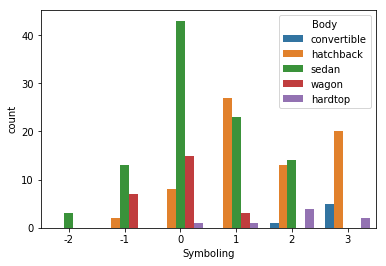

In [81]:
#Now lets look at which types  of car body is on the safe an risky side . 
sns.countplot(x = "Symboling" ,data = vis , hue = "Body" )

#looks like hatchbacks are more risky in terms of safety .

In [82]:
#Now lets look at some columns which may be correlated
vis.columns

Index(['Symboling', 'Name', 'Fuel', 'Aspiration', 'Doors', 'Body', 'Drive',
       'Engineloc', 'Wheelbase', 'Length', 'Width', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'Fuelsys', 'boreratio',
       'stroke', 'Compression', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'Make'],
      dtype='object')

In [83]:
#from scipy.stats import pearsonr
#pearsonr(vis.horsepower, vis.peakrpm)#(0.13107250535631135, 0.06102875327343993)
#pearsonr(vis.horsepower, vis.cylindernumber)#((0.6920162457155671, 1.4924414880668118e-30)) , so there is a strong correlation
#pearsonr(vis.horsepower, vis.peakrpm)#(0.13107250535631135, 0.06102875327343993)
#pearsonr(vis.horsepower, vis.peakrpm)#((0.13107250535631135, 0.06102875327343993))
#pearsonr(vis.horsepower, vis.enginesize)#(0.8097686545377306, 6.824373259368219e-49
#vis.info()
#vis.cylindernumber = vis.cylindernumber.replace({'two':2 ,"eight" : 8 ,'five':5,'four':4,'six':6,'three':3,'twelve':12})
#Since there is a strong correlation between both horsepower and cylindernumber and enginesize we only nee one of them.
#we'll check which one of them is a strong dependant for the price .

C:\Users\Megdin10\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


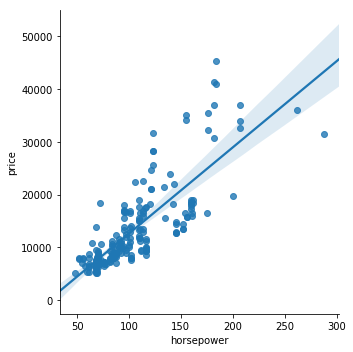

In [84]:
sns.lmplot(x = 'horsepower' , y = "price", data = vis) 
#we'll take horsepower as a prioritized dependant feature over the cylinder number

,Symboling,Name,Fuel,Aspiration,Doors,Body,Drive,Engineloc,Wheelbase,Length,...,Fuelsys,boreratio,stroke,Compression,horsepower,peakrpm,citympg,highwaympg,price,Make
15,0,bmw x4,0,0,1,sedan,rwd,0,103.5,189.0,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0,bmw
16,0,bmw x5,0,0,0,sedan,rwd,0,103.5,193.8,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,bmw
17,0,bmw x3,0,0,1,sedan,rwd,0,110.0,197.0,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0,bmw
47,0,jaguar xj,0,0,1,sedan,rwd,0,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0,jaguar
48,0,jaguar xf,0,0,1,sedan,rwd,0,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0,jaguar
49,0,jaguar xk,0,0,0,sedan,rwd,0,102.0,191.7,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar
70,-1,buick skyhawk,1,1,1,sedan,rwd,0,115.6,202.6,...,idi,3.58,3.64,21.5,123,4350,22,25,31600.0,buick
71,-1,buick opel isuzu deluxe,0,0,1,sedan,rwd,0,115.6,202.6,...,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0,buick
72,3,buick skylark,0,0,0,convertible,rwd,0,96.6,180.3,...,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0,buick
73,0,buick century special,0,0,1,sedan,rwd,0,120.9,208.1,...,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,buick


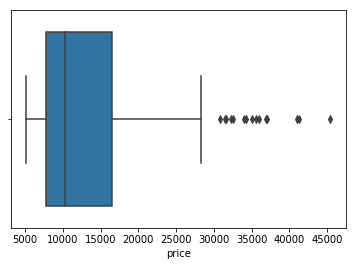

In [85]:
sns.boxplot(x = "price",data =vis)
vis[vis.price > 30000]
# price column has a few outliers but they are important outlier because they represent the premium car brands .

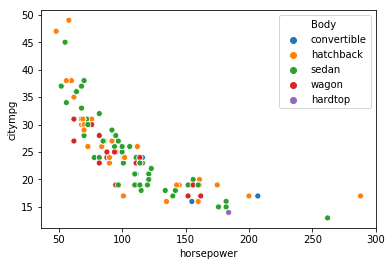

In [86]:
sns.scatterplot(x='horsepower' ,y='citympg',data = vis,hue = "Body")
#sns.scatterplot(x='horsepower' ,y='citympg',data = vis,hue = "Aspiration")
# As expected sedans and hatchbacks with less power gets more range 
# her we see most pf the vehicles who have more that 100Hp is mostly sedans+

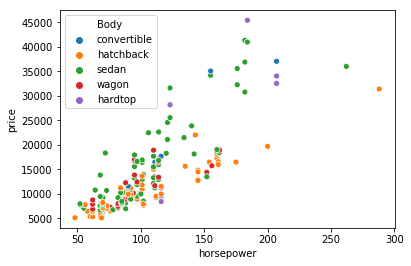

In [87]:
sns.scatterplot(x='horsepower' ,y = "price",data = vis,hue = "Body")
#this plot is exactly the same as a plot given above , but in this we can see
#quite clearly that sedans prices increseas greatly for horse power greater than 12o mark .

In [88]:
vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
Symboling         205 non-null int64
Name              205 non-null object
Fuel              205 non-null int64
Aspiration        205 non-null int64
Doors             205 non-null int64
Body              205 non-null object
Drive             205 non-null object
Engineloc         205 non-null int64
Wheelbase         205 non-null float64
Length            205 non-null float64
Width             205 non-null float64
carheight         205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
Fuelsys           205 non-null object
boreratio         205 non-null float64
stroke            205 non-null float64
Compression       205 non-null float64
horsepower        205 non-null int64
peakrpm           205 non-null int64
citympg           205 non-null int64
highwaympg        205 no

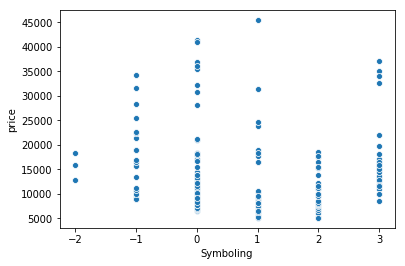

In [89]:
vis.groupby(["Symboling"]).count()
sns.scatterplot(x = vis.Symboling, y = vis.price)
# We see that safety of the car doesnt have a drastic impact as we had hoped .
# thats to say people dont care abuout safety that much when buying a car.

# Model Creation


In [90]:
x = a[[       'Fuel',  'Aspiration',       'Doors',   'Wheelbase',
            'Length',       'Width',   'carheight',  'curbweight',
        'enginesize',   'boreratio',      'stroke', 'Compression',
        'horsepower',     'peakrpm',     'citympg',  'highwaympg',
             'price', 'convertible',     'hardtop',   'hatchback',
             'sedan',       'wagon',         '4wd',         'fwd',
               'rwd',        'dohc',           'l',         'ohc',
               'ohv',       'rotor',        '1bbl',        '2bbl',
              '4bbl',         'idi',         'mfi',        'mpfi',
              'spdi',        'spfi',            -2,            -1,
                   0,             1,             2,             3,
       'alfa-romero',        'audi',         'bmw',       'buick',
         'chevrolet',       'dodge',       'honda',       'isuzu',
            'jaguar',       'mazda',     'mercury',  'mitsubishi',
            'nissan',     'peugeot',    'plymouth',     'porsche',
           'renault',        'saab',      'subaru',      'toyota',
        'volkswagen',       'volvo']]

y = a["price"]

In [91]:
x_t,x_test,y_t,y_test = train_test_split(x,y, test_size = 0.3,random_state = 1)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score 

In [92]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
sv = SVR()
lr.fit(x_t,y_t)
dt.fit(x_t,y_t)
sv.fit(x_t,y_t)

C:\Users\Megdin10\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
pred_lr = lr.predict(x_test)
pred_dt = dt.predict(x_test)
pred_sv = sv.predict(x_test)

In [94]:
print(mean_absolute_error(y_test,pred_lr))
print(mean_absolute_error(y_test,pred_dt))
print(mean_absolute_error(y_test,pred_sv))

0.0002818956151801807
358.06451612903226
5129.912847938197


In [95]:
print(lr.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(sv.score(x_test,y_test))

0.9999999999999593
0.9851321611933154
-0.0464329660749101


In [96]:
r1 = r2_score(y_test,pred_lr)
r2= r2_score(y_test,pred_dt)
r3= r2_score(y_test,pred_sv)

print(r1)
print(r2)
print(r3)

0.9999999999999593
0.9851321611933154
-0.0464329660749101
